# Image processing with scikit-image


- scikit-image is a collection of algorithms for image processing.


- It also contains several sample images in its database, which you can use freely.


- And it works with with numpy arrays, so you can handle images as arrays.


**References:**

https://scikit-image.org/

https://github.com/scikit-image/scikit-image

You need to install:

**conda install scikit-image**


And some optional dependencies:

**conda install pooch**

**conda install plotly**

In [1]:
import skimage

## Image database:

The submodule data contains all kinds of images:

See a list here: https://scikit-image.org/docs/stable/api/skimage.data.html

In [2]:
from skimage import data

In [3]:
coffee_image = data.coffee()

type(coffee_image)

numpy.ndarray

In [4]:
print(coffee_image.shape)

(400, 600, 3)


In [5]:
coffee_image_ch1 = coffee_image[:,:,0]

In [6]:
print(coffee_image_ch1.shape)

(400, 600)


In [7]:
import matplotlib.pyplot as plt

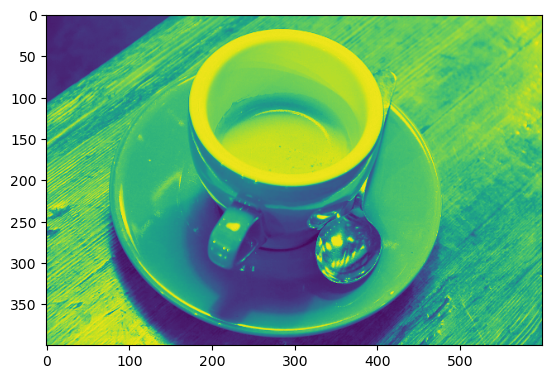

In [8]:
fig, ax = plt.subplots()

ax.imshow(coffee_image_ch1, cmap="viridis")
#ax.axis('off')  # clear x- and y-axes
plt.show()

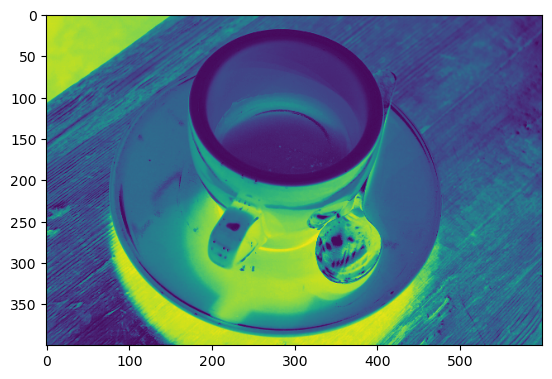

In [9]:
fig, ax = plt.subplots()

ax.imshow(coffee_image_ch1, cmap="viridis_r")
#ax.axis('off')  # clear x- and y-axes
plt.show()

# Example: 

I copied the description from: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.cell

## Cell image

skimage.data.cell()

Cell floating in saline.

This is a quantitative phase image retrieved from a digital hologram using the Python library qpformat. The image shows a cell with high phase value, above the background phase.

Because of a banding pattern artifact in the background, this image is a good test of thresholding algorithms. **The pixel spacing is 0.107 µm.**

These data were part of a comparison between several refractive index retrieval techniques for spherical objects as part of [1].

This image is CC0, dedicated to the public domain. You may copy, modify, or distribute it without asking permission.


[1] Paul Müller, Mirjam Schürmann, Salvatore Girardo, Gheorghe Cojoc, and Jochen Guck. “Accurate evaluation of size and refractive index for spherical objects in quantitative phase imaging.” Optics Express 26(8): 10729-10743 (2018). DOI:10.1364/OE.26.010729

In [10]:
cell_image = data.cell()

type(cell_image)

numpy.ndarray

In [11]:
print(cell_image.shape)

(660, 550)


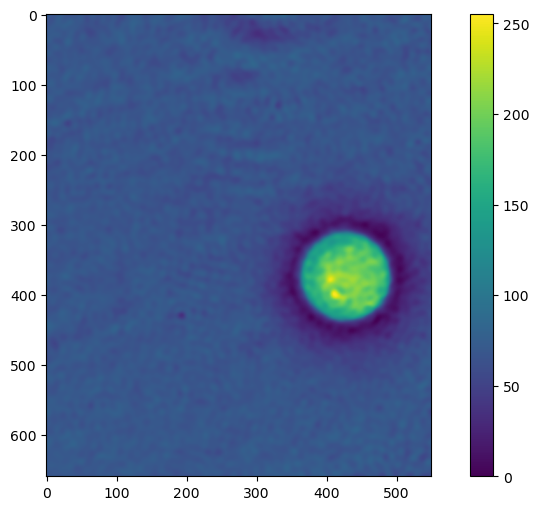

In [12]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))

A = ax.imshow(cell_image)

plt.colorbar(A)

plt.show()

In [13]:
import numpy as np

In [14]:
print("max. value is:", np.max(cell_image))
print("min. value is:", np.min(cell_image))

max. value is: 255
min. value is: 0


### Histogram:

In [15]:
# Reshaping a 2D array into a 1D array

B = np.reshape(cell_image,(cell_image.size,1))

print(B.shape)


(363000, 1)


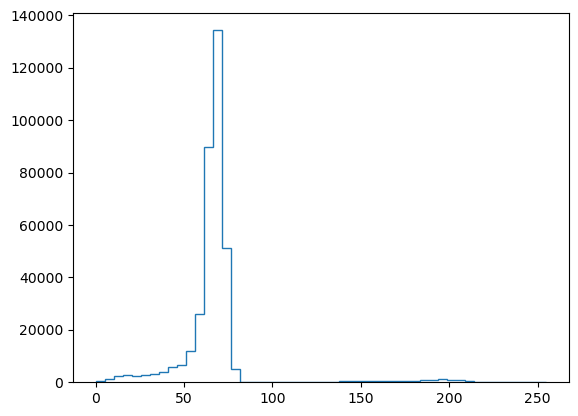

In [16]:
plt.hist(B, histtype='step', bins = 50)

plt.show()

## 1. Array manipulation

### 1.1 Conditionals

#### Replace with NANs all the intensity values < 100.

We can use np.where(), see documentation: https://numpy.org/doc/stable/reference/generated/numpy.where.html

In [17]:
C = np.where(B < 100, np.nan, B)

In [18]:
print(B)

[[71]
 [71]
 [72]
 ...
 [59]
 [60]
 [61]]


In [19]:
print(C)

[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


### New histogram:

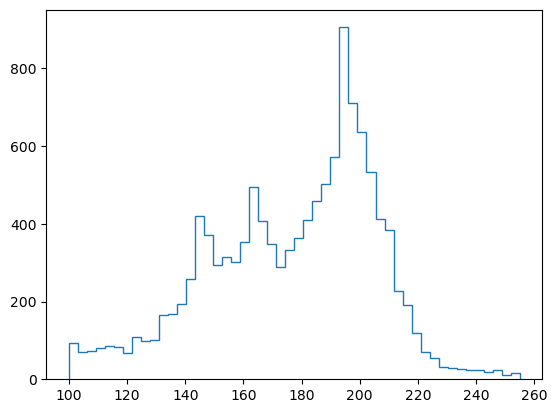

In [20]:
plt.hist(C, bins=50, histtype='step')
plt.show()

In [21]:
print(B.shape)
print(C.shape)

(363000, 1)
(363000, 1)


In [22]:
# Reshape back the image to 2D

D = np.reshape(C, cell_image.shape)

In [23]:
print(cell_image.shape)
print(D.shape)

(660, 550)
(660, 550)


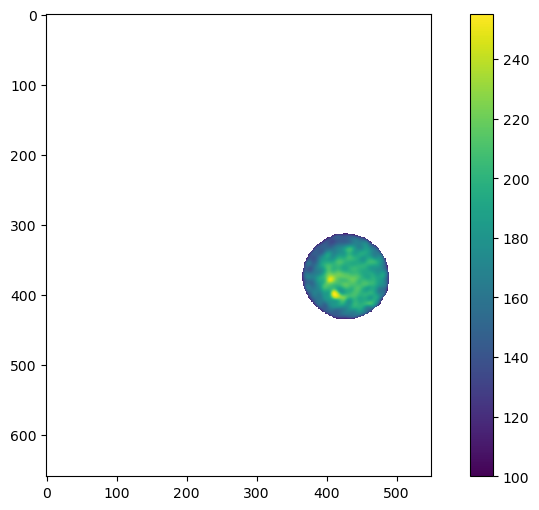

In [24]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))

AA = ax.imshow(D)

plt.colorbar(AA)

plt.show()

In [25]:
print("max. value is:", np.nanmax(D))
print("min. value is:", np.nanmin(D))

max. value is: 255.0
min. value is: 100.0


### 1.2 Selecting subsets / subarrays

Since the cell is just occupying the space on the middle right, let's plot just that area.


In [26]:
print(D.shape)

(660, 550)


In [27]:
E = D[300:450,350:500]

In [28]:
print(E.shape)

(150, 150)


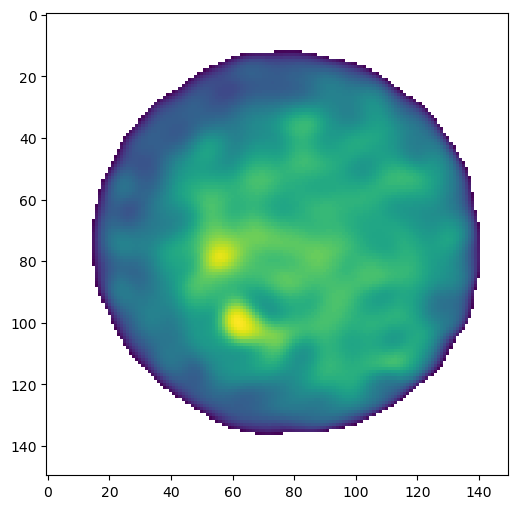

In [29]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(E)
plt.show()

## 1.3 Indices of the maximum:

In [30]:
print(np.max(E)) # it is not good when you have NANs

nan


In [31]:
print(np.nanmax(E))

255.0


In [32]:
idx_max = np.where(np.nanmax(E)==E) # Boolean operator

In [33]:
print(idx_max)

(array([100]), array([62]))


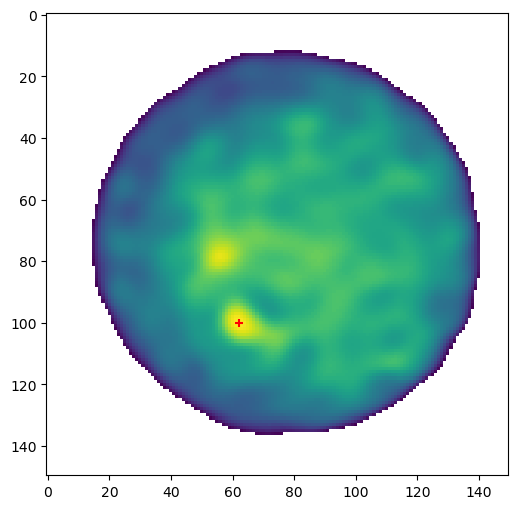

In [34]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(E)
ax.scatter(idx_max[1],idx_max[0], color='red', marker='+')

plt.show()

## Local maxima:

Examples: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_peak_local_max.html


Documentation: https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.peak_local_max


In [35]:
from skimage.feature import peak_local_max # Does not like NANs

### Change NANs to numbers:

https://numpy.org/doc/stable/reference/generated/numpy.nan_to_num.html

In [36]:
print(E)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [37]:
np.nan_to_num(E, copy=False, nan=0.0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
print(E)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Check unique elements in array

https://numpy.org/doc/stable/reference/generated/numpy.unique.html

In [39]:
np.unique(E)

array([  0., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153.,
       154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164.,
       165., 166., 167., 168., 169., 170., 171., 172., 173., 174., 175.,
       176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186.,
       187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197.,
       198., 199., 200., 201., 202., 203., 204., 205., 206., 207., 208.,
       209., 210., 211., 212., 213., 214., 215., 216., 217., 218., 219.,
       220., 221., 222., 223., 224., 225., 226., 227., 228., 229., 230.,
       231., 232., 233., 234., 235., 236., 237., 238., 239., 240., 241.,
       242., 243., 244., 245., 246., 247., 248., 24

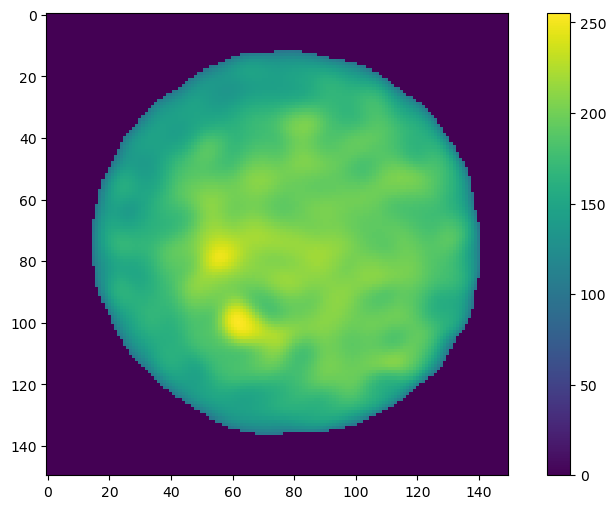

In [40]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))
AA = ax.imshow(E)
plt.colorbar(AA)
plt.show()

In [41]:
coordinates = peak_local_max(E, min_distance=1, num_peaks=2)

In [42]:
print(coordinates)

print(type(coordinates))

[[100  62]
 [ 78  56]]
<class 'numpy.ndarray'>


In [43]:
print(coordinates[1][0])

78


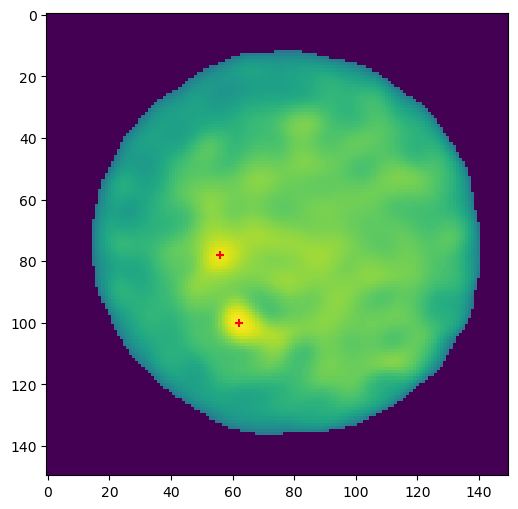

In [44]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(E)
ax.scatter(coordinates[0][1], coordinates[0][0], color='red', marker='+')
ax.scatter(coordinates[1][1], coordinates[1][0], color='red', marker='+')
plt.show()

### Exercise: Distance between nuclei

In [45]:
def distance_nuclei(peak1, peak2):
    
    pixel_length = 0.107 # in micras/pixel
    
    distance = np.sqrt((peak1[1] - peak2[1])**2 + (peak1[0] - peak2[0])**2) # in pixels
    
    return distance*pixel_length # in micras

In [46]:
print(coordinates[0])

[100  62]


In [47]:
print(coordinates[1])

[78 56]


In [48]:
dist = distance_nuclei(coordinates[0], coordinates[1])

In [49]:
print('distance in micras between peak 1 and peak2 =', dist)

distance in micras between peak 1 and peak2 = 2.439975409712155


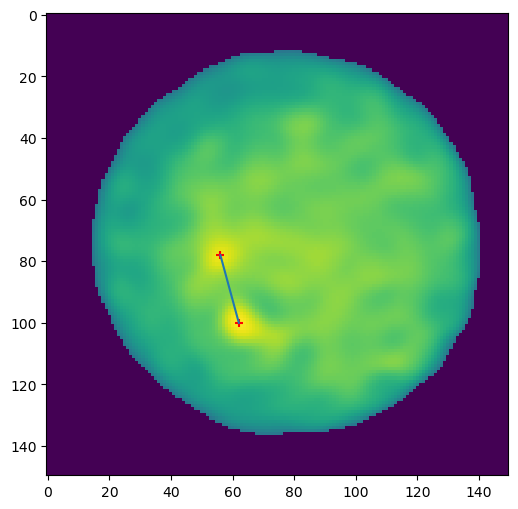

In [50]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(E)
ax.scatter(coordinates[0][1], coordinates[0][0], color='red', marker='+')
ax.scatter(coordinates[1][1], coordinates[1][0], color='red', marker='+')

ax.plot([coordinates[0][1], coordinates[1][1]], [coordinates[0][0], coordinates[1][0]], linestyle = '-')

plt.show()

## 1.3 Cell tagging:

You are generally interested in generating binary images.

In [51]:
F = np.where(E > 220, 1.,0.)

In [52]:
print(F)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


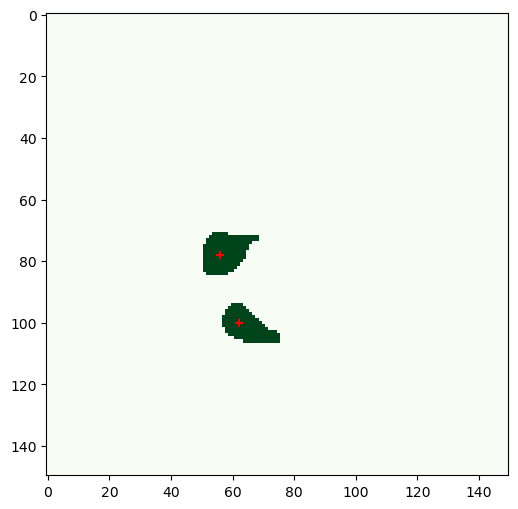

In [53]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(F, cmap = 'Greens')
ax.scatter(coordinates[0][1], coordinates[0][0], color='red', marker='+')
ax.scatter(coordinates[1][1], coordinates[1][0], color='red', marker='+')
plt.show()

In [54]:
print(np.unique(F))

[0. 1.]


# Exercise: 

Write a function to calculate the area occupied by the nuclei.

Remember that each pixel has a size $0.107\,\mu m$, so the pixel area is $(0.107)^2\,\mu m^2$.

In [55]:
def area_nuclei(binary_array):
    
    pixel_area = 0.107**2 # in units of micras^2
    
    number_pixels = np.sum(binary_array) # in pixels
    
    total_area = pixel_area * number_pixels # in micras^2
    
    return number_pixels, total_area

In [56]:
print('pixels =', area_nuclei(F)[0], ', area in micras^2 =', area_nuclei(F)[1])

pixels = 330.0 , area in micras^2 = 3.77817
